In [141]:
#libs analise

from logging import warning
import warnings
import pandas as pd
import numpy as np

#Libs gaficas
import matplotlib.pyplot as plt
import seaborn as sns

#Avisos
import warnings
warnings.filterwarnings('ignore')

#Configuração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.precision',10)

#Configuração matplotlib
plt.rcParams['figure.figsize']= (15,6)
plt.style.use('seaborn-darkgrid')

In [142]:
#Lendo arquivos
df = pd.read_csv('https://raw.githubusercontent.com/denisbrunom/Precificacao_aluguel/main/house_data.csv')

#Dimensão
df.shape

(10692, 13)

In [143]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [144]:
df.drop(columns=['fire insurance (R$)', 'total (R$)'], inplace=True)

In [145]:
#campos vazios
df.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [146]:
#campos unicos
df.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [148]:
df.shape

(10692, 11)

In [149]:
Colunas_Categoricas = df.columns[df.dtypes ==object]
Colunas_Numericas = df.columns[df.dtypes !=object]
Colunas_Categoricas, Colunas_Numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [150]:
#analise campos objetos
df['floor'].value_counts(normalize=True) *100



-      23.0172091283
1      10.1103628881
2       9.2124953236
3       8.7074448186
4       6.9958847737
5       5.6116722783
6       5.0411522634
7       4.6483352039
8       4.5828656940
9       3.4511784512
10      3.3389450056
11      2.8338945006
12      2.4036662926
13      1.8705574261
14      1.5899738122
15      1.3748597082
16      1.0194537972
17      0.8978675645
18      0.7014590348
19      0.4956977179
20      0.4115226337
21      0.3928170595
25      0.2338196783
23      0.2338196783
22      0.2244668911
26      0.1870557426
24      0.1777029555
27      0.0748222970
28      0.0561167228
29      0.0467639357
32      0.0187055743
35      0.0093527871
46      0.0093527871
301     0.0093527871
51      0.0093527871
Name: floor, dtype: float64

In [151]:
#loop
for coluna in Colunas_Categoricas:
    #fazendo a analise por coluna categoricas
    analise = df[coluna].value_counts(normalize=True) *100
    #visualizando resultado
    print(coluna, '\n', analise, '\n')
    

city 
 São Paulo         55.0598578376
Rio de Janeiro    14.0385334830
Belo Horizonte    11.7658062103
Porto Alegre      11.1578750468
Campinas           7.9779274224
Name: city, dtype: float64 

floor 
 -      23.0172091283
1      10.1103628881
2       9.2124953236
3       8.7074448186
4       6.9958847737
5       5.6116722783
6       5.0411522634
7       4.6483352039
8       4.5828656940
9       3.4511784512
10      3.3389450056
11      2.8338945006
12      2.4036662926
13      1.8705574261
14      1.5899738122
15      1.3748597082
16      1.0194537972
17      0.8978675645
18      0.7014590348
19      0.4956977179
20      0.4115226337
21      0.3928170595
25      0.2338196783
23      0.2338196783
22      0.2244668911
26      0.1870557426
24      0.1777029555
27      0.0748222970
28      0.0561167228
29      0.0467639357
32      0.0187055743
35      0.0093527871
46      0.0093527871
301     0.0093527871
51      0.0093527871
Name: floor, dtype: float64 

animal 
 acept        77.777777

Na analise acima podemos perceber que temos um andar que não faz sentido, então vamos acertar ese valor, erro provavelmente na tabulação da tabela.

In [185]:
#correção dos dados
#ajustando o andar
df.loc[df['floor']=='301']
#passei o indice 2562 e coluna 5 que é o campo que queria mudar.
df.iloc[2562,5]=30
#ajustar o "-"
df['floor'] = df['floor'].apply(lambda Registro : 0 if Registro == "-" else Registro)
df['floor'] = pd.to_numeric(df['floor'])
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [186]:
print(Colunas_Numericas)

Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
       'rent amount (R$)', 'property tax (R$)'],
      dtype='object')


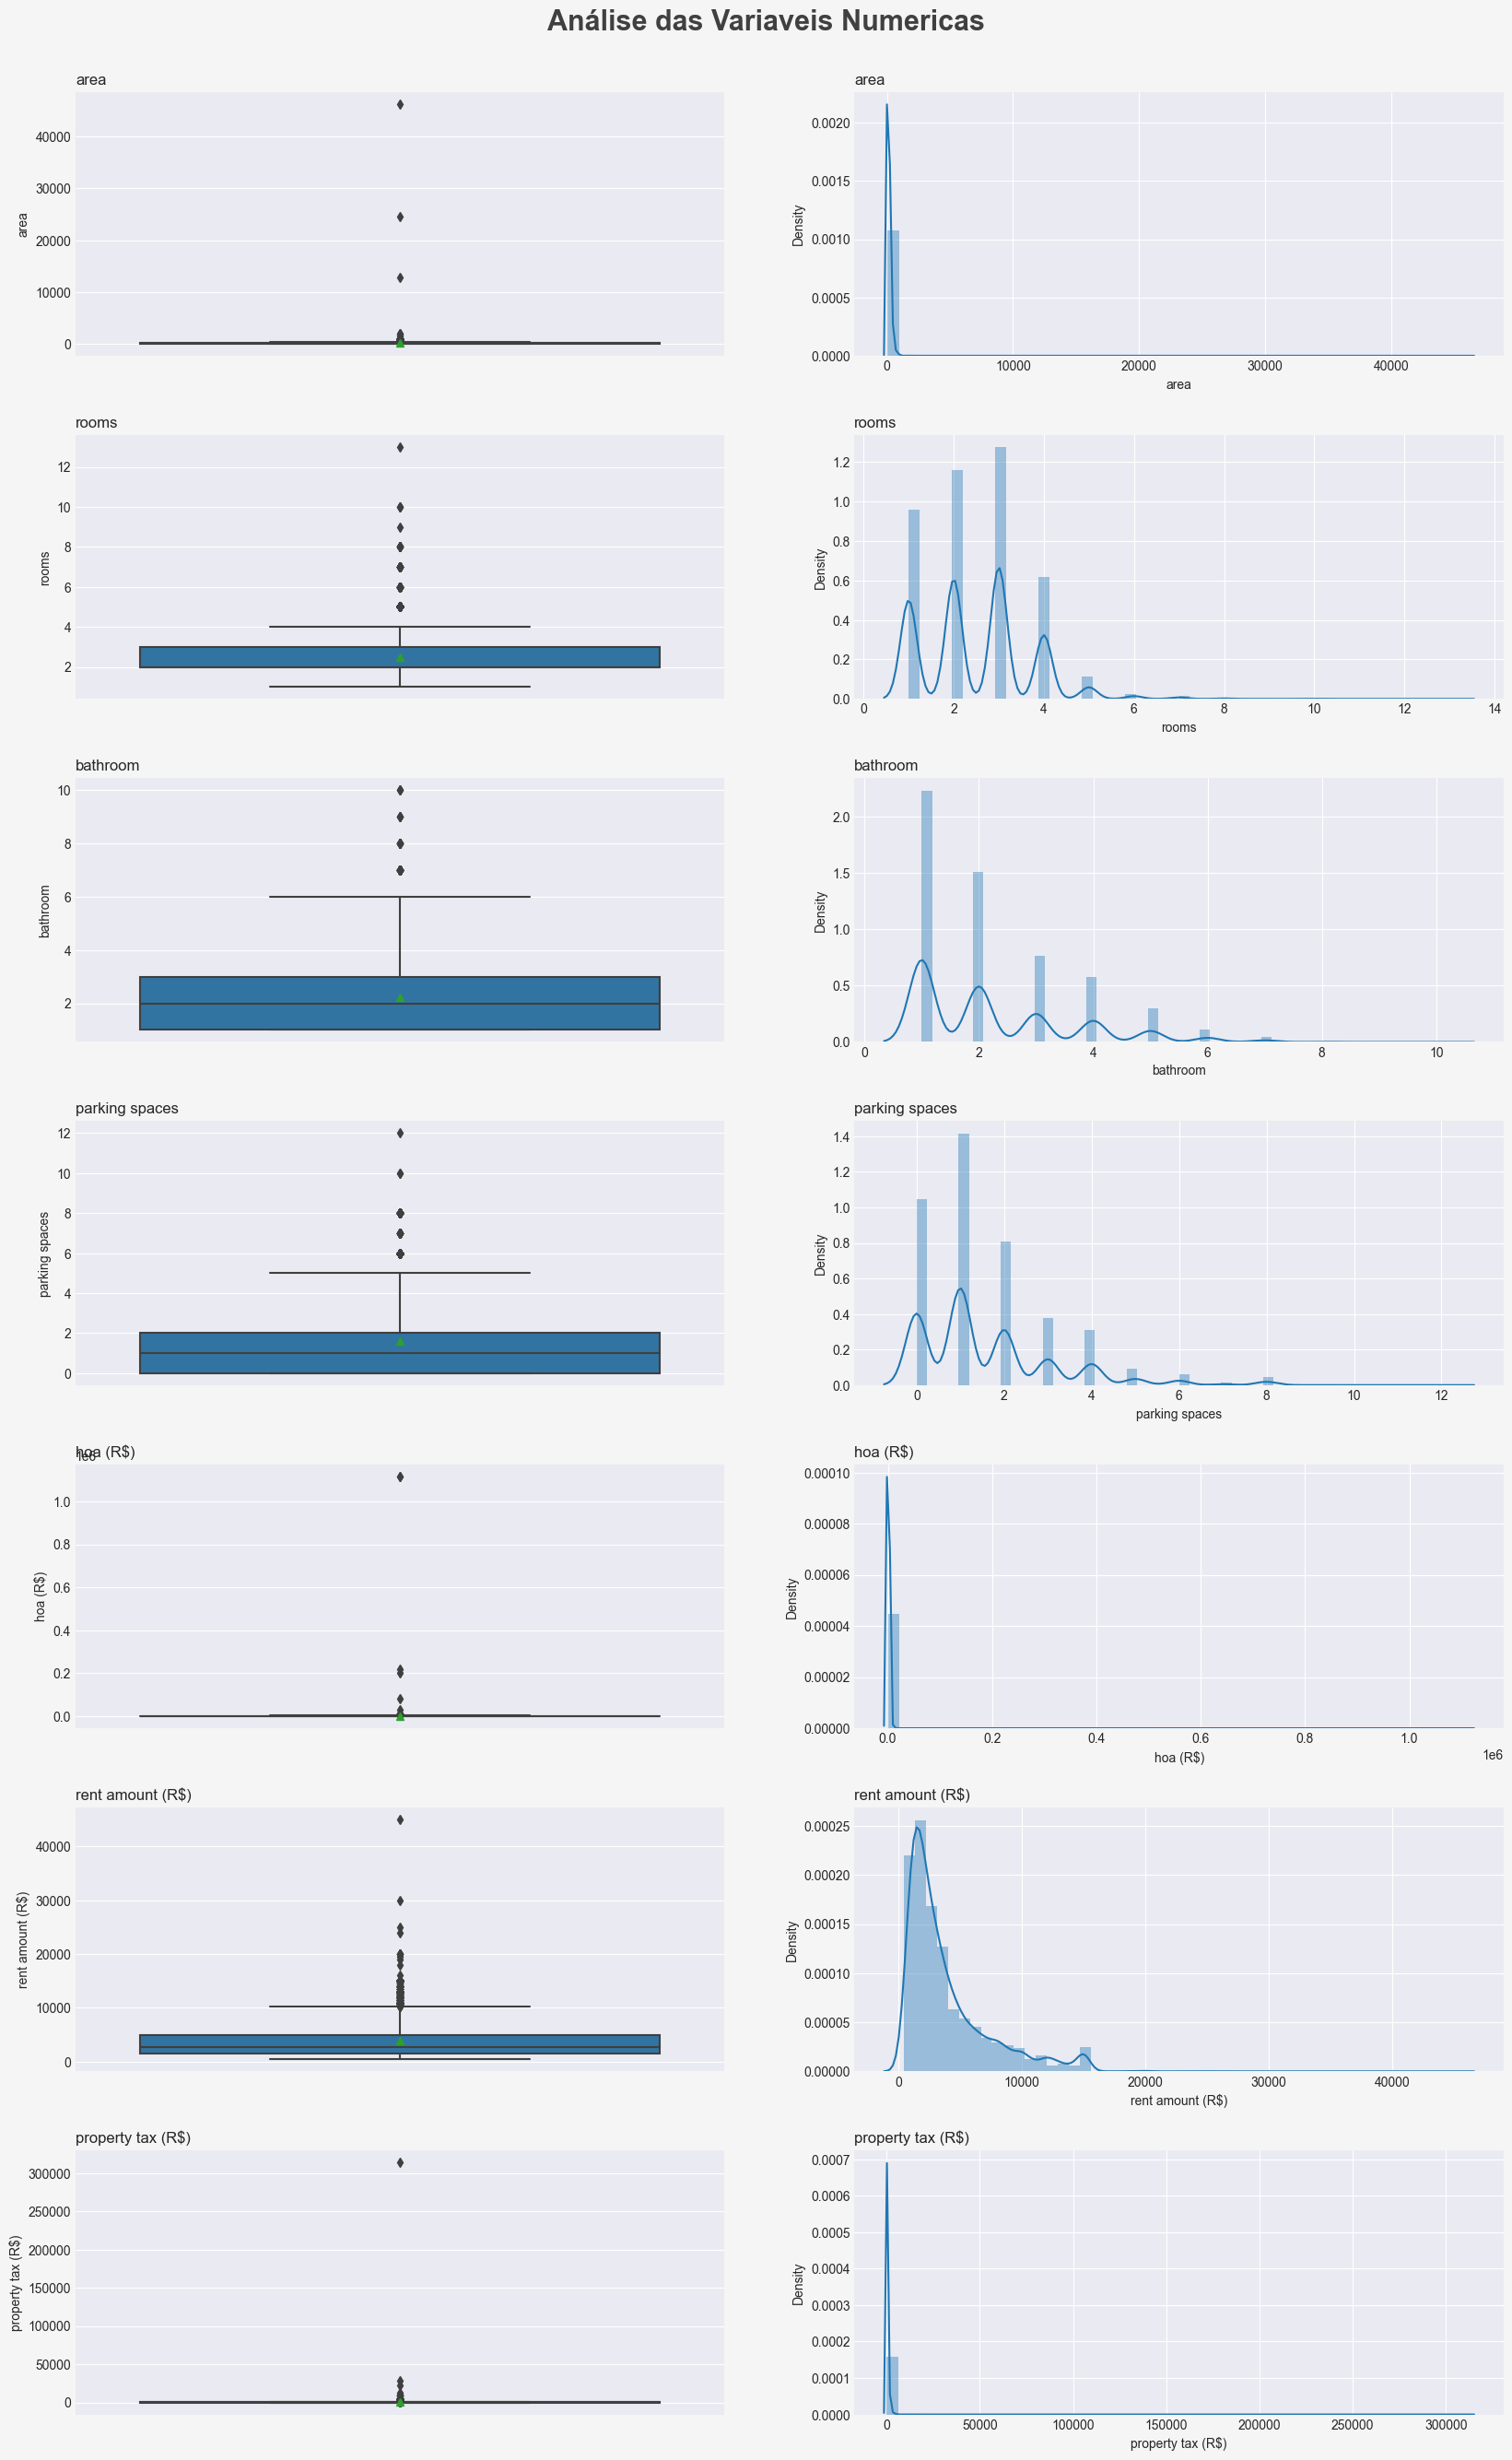

In [200]:
#grid <-graficos
#tamanho
Figura, Eixo = plt.subplots( figsize =(20,30) )

#cor fundo
Cor_Fundo = '#f5f5f5'
Figura.set_facecolor( Cor_Fundo )

#Peleta de cores
Paleta_Cores = sns.color_palette('flare',len(Colunas_Numericas)*2)
#titulos
plt.suptitle('Análise das Variaveis Numericas',fontsize=22,color='#404040',fontweight=600)
#estrutura
Linhas = 7 # Todas as informação numericas
Colunas = 2 # Boxplot - displot
Posicao = 1 # Posição inicial do Grid

#criação do for para percorrer o grid
for Coluna in Colunas_Numericas:
    #plotando no grid -- Boxplot
    plt.subplot(Linhas, Colunas, Posicao)

    #Titulo
    plt.title( f'{Coluna}', loc='left', fontsize=12, fontweight=300)

    #plot boxplot
    sns.boxplot(data=df, y=Coluna, showmeans=True)
    #mudar a posicao
    Posicao += 1

    #plotando no grid -- Displot
    plt.subplot(Linhas, Colunas, Posicao)
    
     #Titulo
    plt.title( f'{Coluna}', loc='left', fontsize=12, fontweight=300)

    #plot displot
    sns.distplot(df[Coluna])
    #mudar a posicao
    Posicao +=1
    #ajuste de Grid
    plt.subplots_adjust( top=0.95, hspace=0.3 )